<a href="https://colab.research.google.com/github/bharathdev329/ICT-DSA/blob/main/Daily_Task_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
d=pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv')
df=pd.DataFrame(d)
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
df.isna().sum()

,0
6,0
148,0
72,0
35,0
0,0
33.6,0
0.627,0
50,0
1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


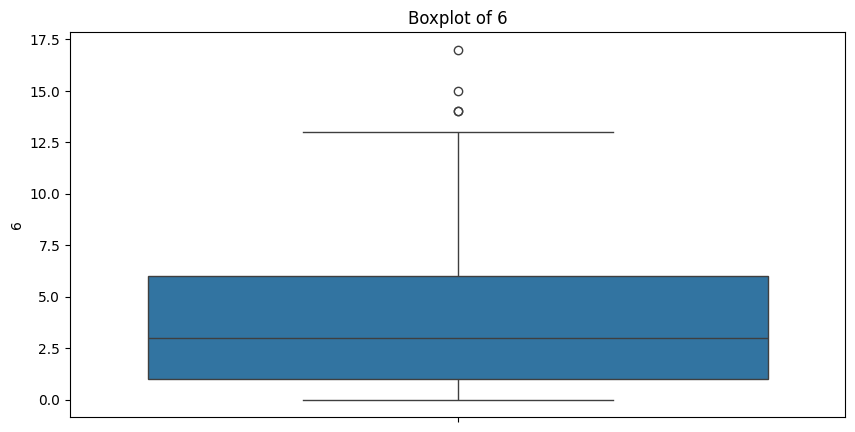

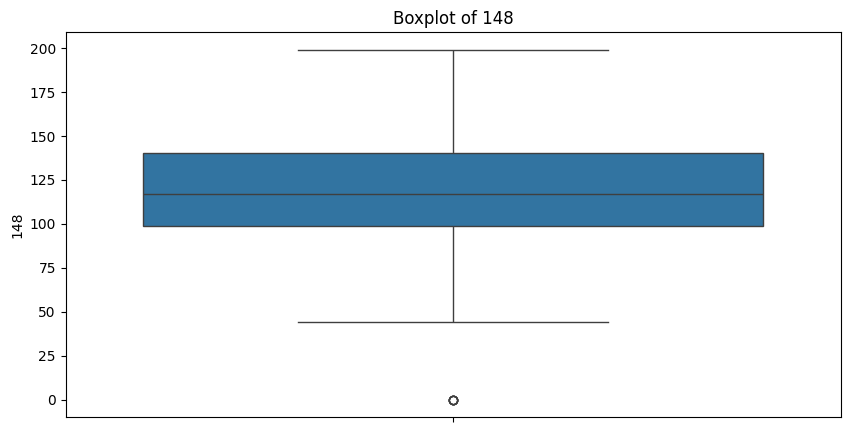

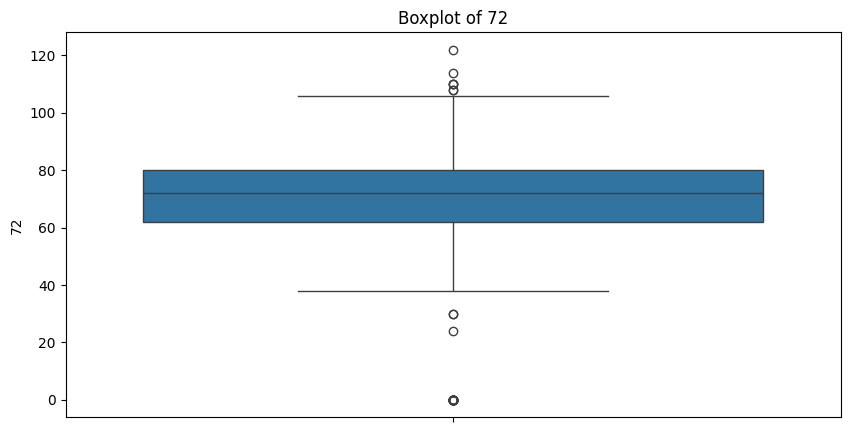

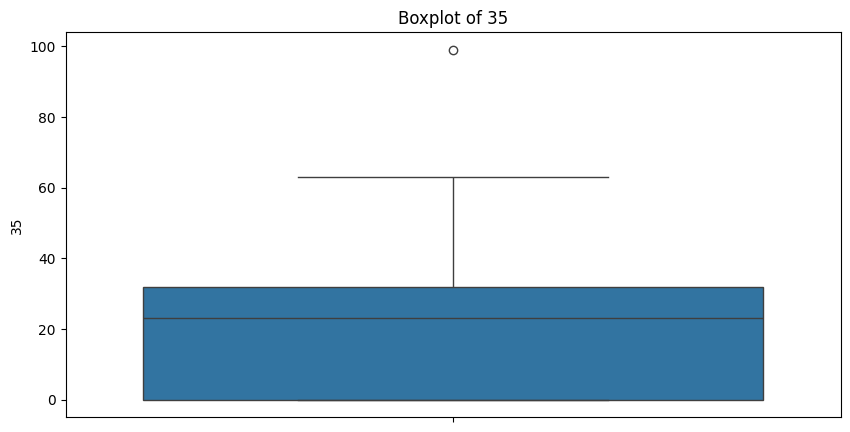

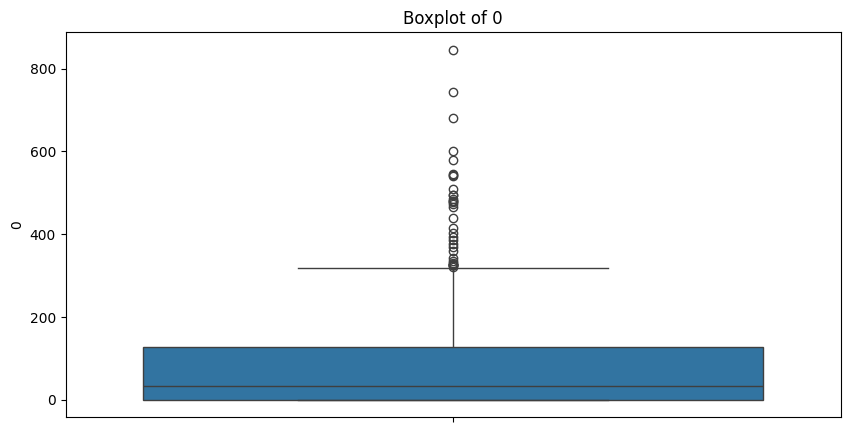

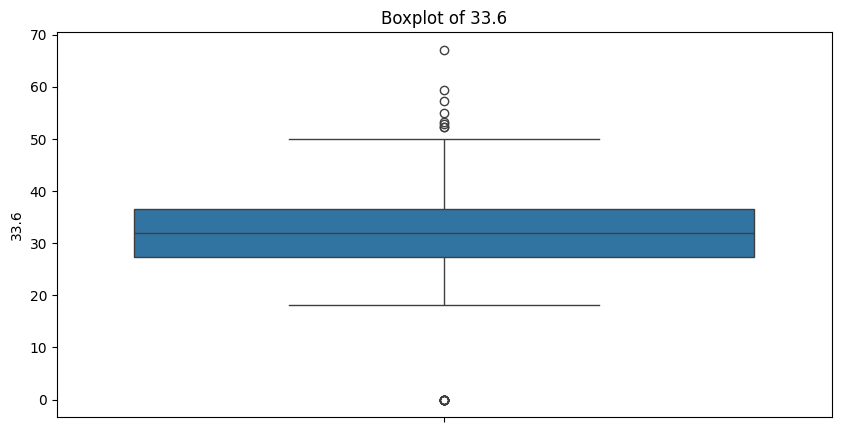

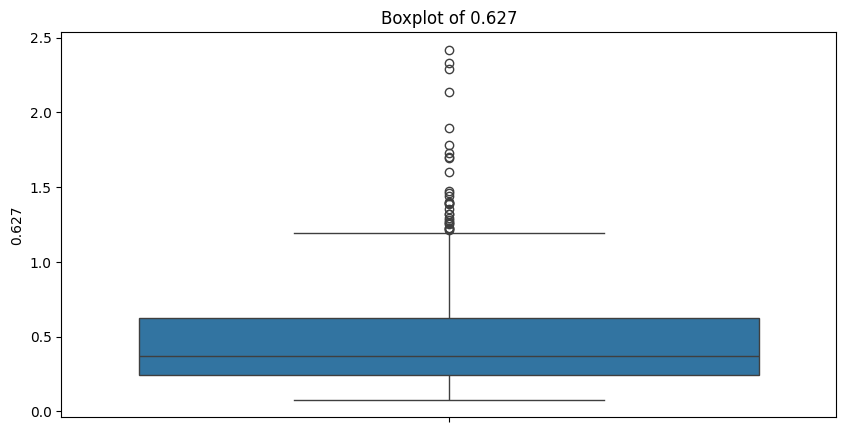

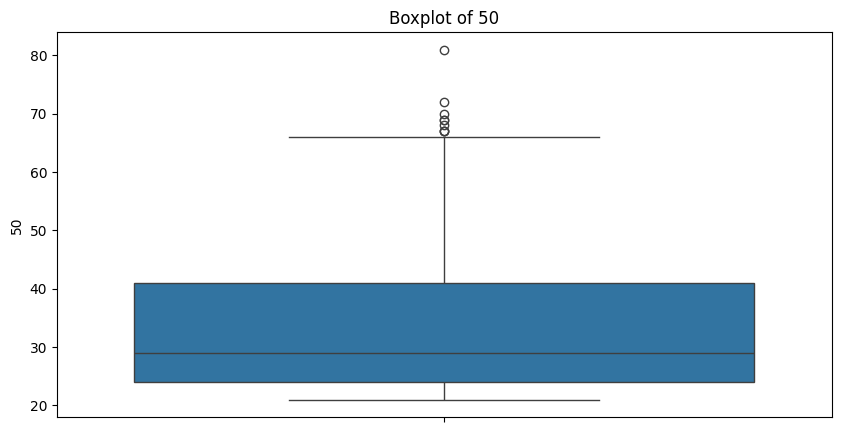

In [9]:
for col in df:
    if col != '1':  # Exclude the 'Outcome' column
        plt.figure(figsize=(10, 5))
        sns.boxplot(df[col])
        plt.title(f'Boxplot of {col}')  # Add a title for clarity
        plt.show()

In [12]:
outlier_col=[]
for column in df:
  if column != '1':
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    print(f"Number of outliers in {column}: {len(outliers)}")
    count=outliers.shape[0]

    if count>0:
        outlier_col.append(column)
print(outlier_col)

Number of outliers in 6: 4
Number of outliers in 148: 5
Number of outliers in 72: 45
Number of outliers in 35: 1
Number of outliers in 0: 34
Number of outliers in 33.6: 19
Number of outliers in 0.627: 29
Number of outliers in 50: 9
['6', '148', '72', '35', '0', '33.6', '0.627', '50']


In [13]:

for column in outlier_col:
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  df[column]=df[column].clip(lower=lower_bound,upper=upper_bound)

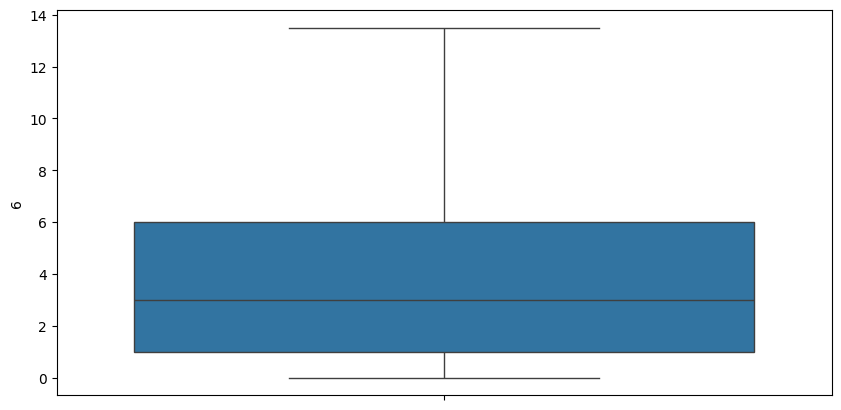

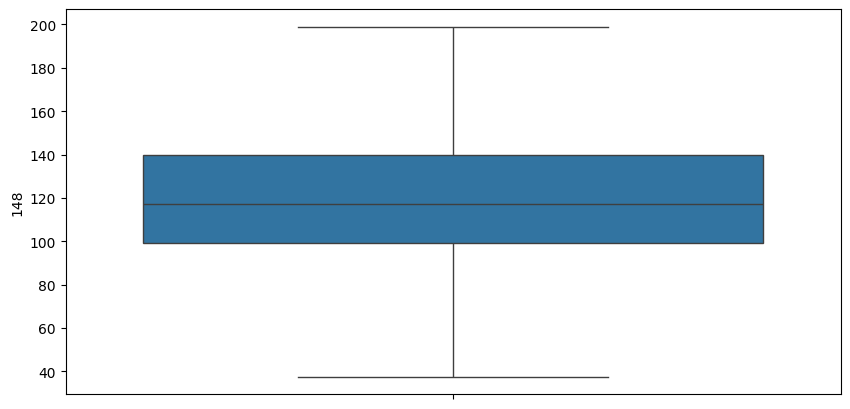

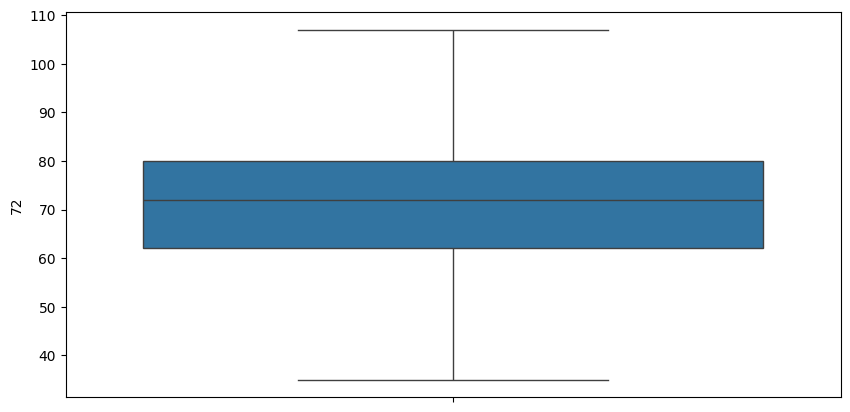

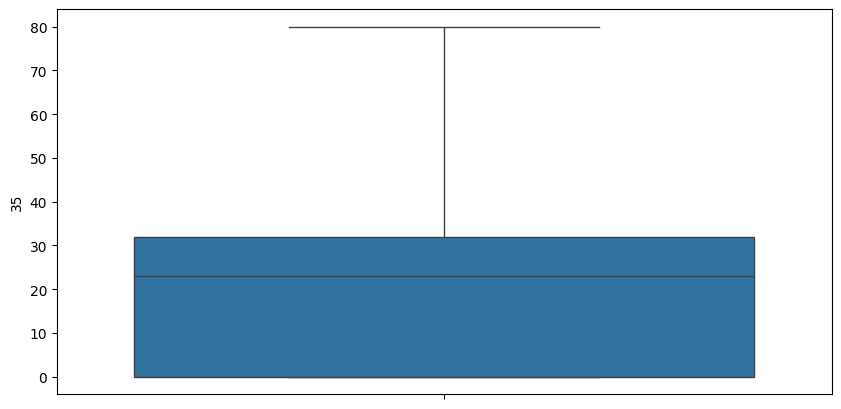

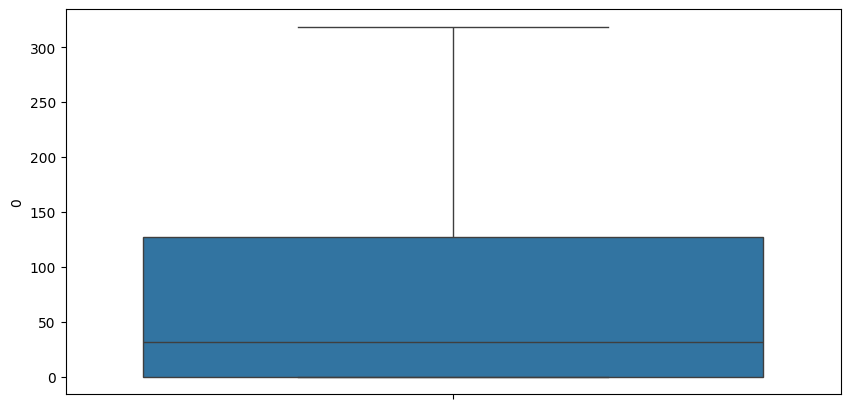

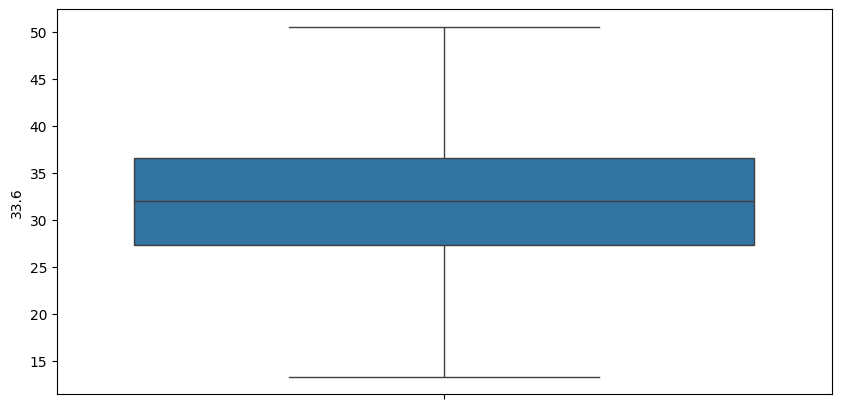

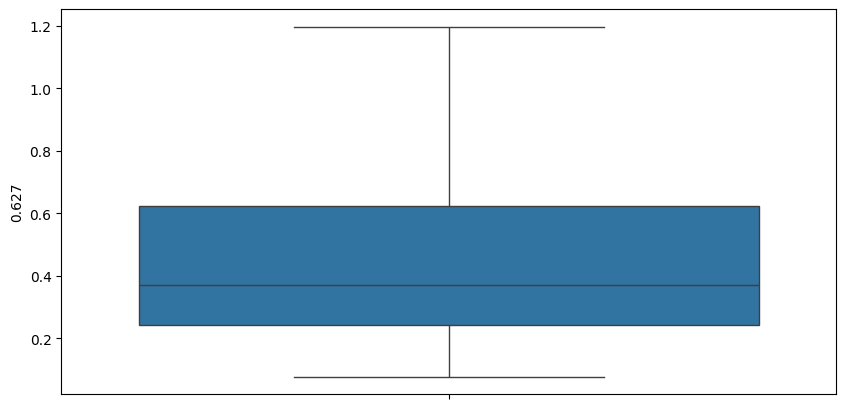

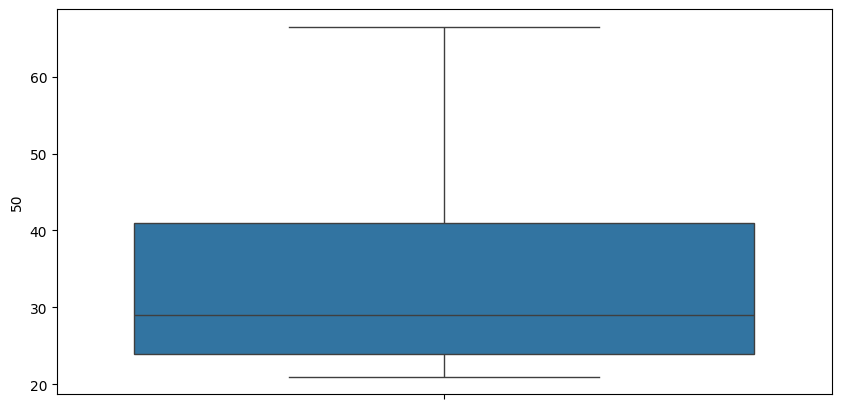

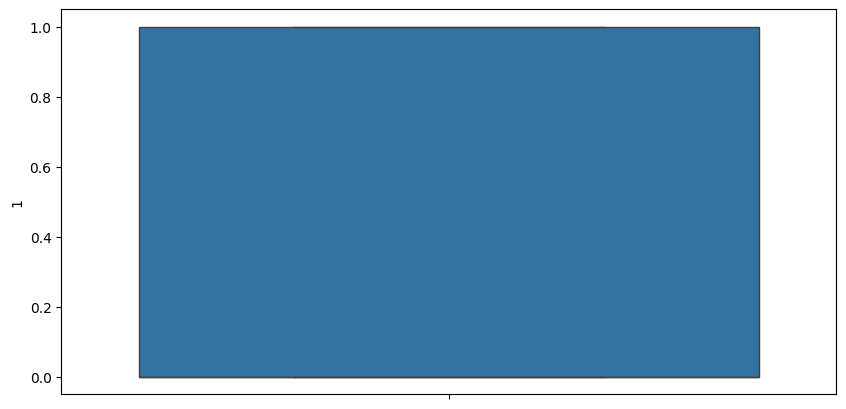

In [14]:
for col in df:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[col])
  plt.show()

In [16]:
df = df.rename(columns={'1': 'outcome'})

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
X = df.drop('outcome', axis=1)  # Features
y = df['outcome']  # Target variable

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

In [20]:
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
y_pred = model.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8051948051948052
